2022-11-20 15:56:39.353905: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-20 15:56:39.353927: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-11-20 15:56:39.359963: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-11-20 15:56:39.395232: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Epoch: 0001, Cost: 2.503652150
Epoch: 0002, Cost: 1.068717952
Epoch: 0003, Cost: 0.854618653
Epoch: 0004, Cost: 0.750256012
Epoch: 0005, Cost: 0.684621683
Epoch: 0006, Cost: 0.637911608
Epoch: 0007, Cost: 0.602260584
Epoch: 0008, Cost: 0.573793833
Epoch: 0009, Cost: 0.550318989
Epoch: 0010, Cost: 0.530489628
Epoch: 0011, Cost: 0.513424391
Epoch: 0012, Cost: 0.498516319
Epoch: 0013, Cost: 0.485331369
Epoch: 0014, Cost: 0.473549998
Epoch: 0015, Cost: 0.462931124
Accuracy:  0.89229995
random_idx :  438
Prediction:  [7]


2022-11-20 15:57:02.615301: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-11-20 15:57:02.640983: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


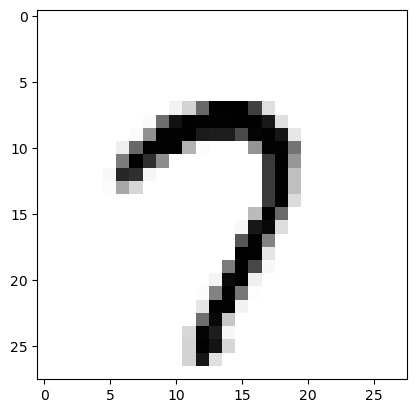

In [7]:
import tensorflow.compat.v1 as tf
import matplotlib.pyplot as plt
import numpy as np
import random

tf.disable_v2_behavior()

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = x_train/255.0, x_test/255.0   #Feature scaling 적용

nb_classes = 10;

x_train_new = x_train.reshape(len(x_train), 784)         #60000 * 784 배열로 변경 - 한행당 이미지 하나 
y_train_new = np.zeros((len(y_train), nb_classes))       #60000 * 10 배열 생성
for i in range(len(y_train_new)):                        
  y_train_new[i,y_train[i]] = 1                          #one-hot encoding 

x_test_new = x_test.reshape(len(x_test), 784)         #60000 * 784 배열로 변경 - 한행당 이미지 하나 
y_test_new = np.zeros((len(y_test), nb_classes))       #60000 * 10 배열 생성
for i in range(len(y_test_new)):                        
  y_test_new[i,y_test[i]] = 1                          #one-hot encoding 


# MNIST data image of shape 28 * 28 = 784
X = tf.placeholder(tf.float32, [None, 784])
# 0 - 9 digits recognition = 10 classes
Y = tf.placeholder(tf.float32, [None, nb_classes])   #6만개의 학습에 대한 10개의 가설 결과

W = tf.Variable(tf.random_normal([784, nb_classes]))  #가설이 10개이고 가설별로 784개의 weigh을 가짐, 즉 7840개의 w
b = tf.Variable(tf.random_normal([nb_classes]))       #가설이 10개니 가설의 b도 10

# Hypothesis (using softmax)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)  #60000 x 10 행렬 - 행별로 열의 값을 확율로 바꿈 

#cross entropy
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Test model
is_correct = tf.equal(tf.arg_max(hypothesis, 1), tf.arg_max(Y, 1))
# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

# parameters
training_epochs = 15  #traing을 몇번 돌릴것인지
batch_size = 100  #한번에 몇건씩 읽은것인지
total_batch = int(len(x_train_new) / batch_size)

with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())
    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0
        
        for i in range(total_batch):
            #print (epoch,batch_size )
            batch_xs = x_train_new[(i * batch_size):(i + 1) * batch_size]     
            batch_ys = y_train_new[(i * batch_size):(i + 1) * batch_size]

            _, cost_val = sess.run([optimizer, cost], feed_dict={X: batch_xs, Y: batch_ys})
            avg_cost += cost_val / total_batch
            
        print("Epoch: {:04d}, Cost: {:.9f}".format(epoch + 1, avg_cost))


    # Test the model using test sets
    print(
        "Accuracy: ",
        accuracy.eval(
            session=sess, feed_dict={X: x_test_new, Y: y_test_new}
        ),
    )

    # Get one and predict
    random_idx = random.randrange(1,10000)
    print ("random_idx : ", random_idx)
    print(
        "Prediction: ",
        sess.run(tf.argmax(hypothesis, 1), feed_dict={X: x_test_new[random_idx : random_idx + 1]}),
    )

    plt.imshow(
        x_test_new[random_idx : random_idx + 1].reshape(28, 28),
        cmap="Greys",
        interpolation="nearest",
    )
    plt.show()